w[0]: 0.393906  b: -0.031804


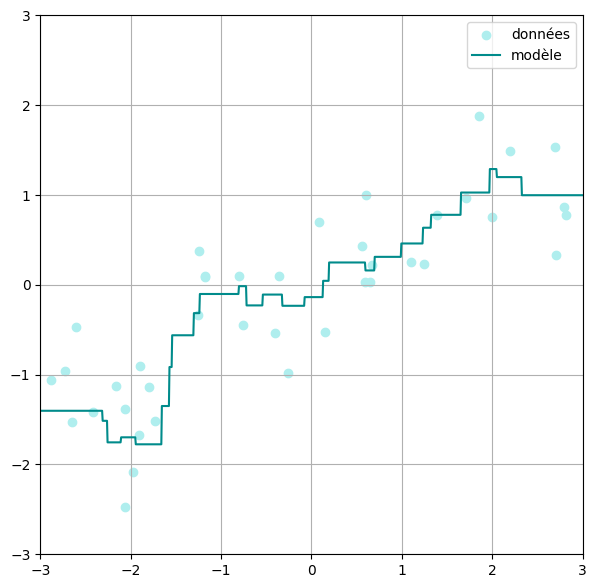

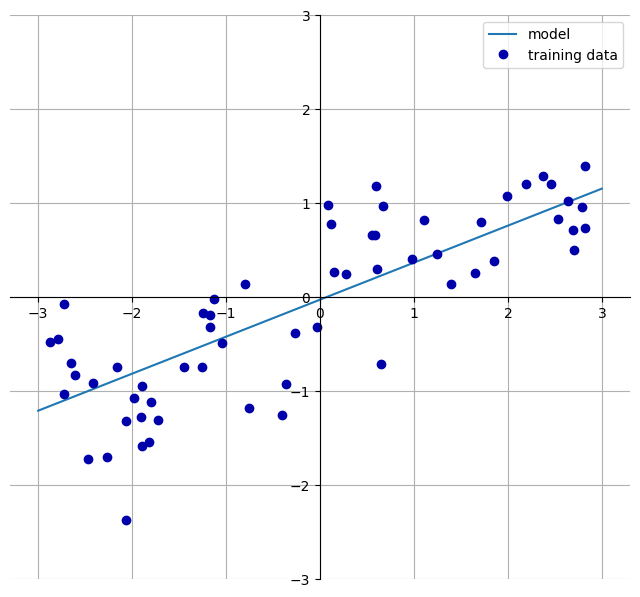

In [52]:
# Régression sur wave
%matplotlib inline

# nécessite mglearn : pip install mglearn
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

X,y = mglearn.datasets.make_wave(n_samples=40)
fig,axe = plt.subplots(figsize=(7,7))
line = np.linspace(-3,3,1000)
reshaped_line = line.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train,y_train)
prediction = regressor.predict(reshaped_line);

axe.scatter(X,y,c='paleturquoise',label="données",marker='o')
axe.plot(line,prediction,c='darkcyan',label="modèle")
axe.legend(loc="best")
axe.axis([-3.0,3.0,-3.0,3.0])
axe.grid(True)

mglearn.plots.plot_linear_regression_wave()

In [43]:
# Déterminer des coefficients, paramètres du modèle, revient à minimiser une fonction de cout
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
linearRegression = LinearRegression().fit(X_train,y_train)
print("Coefficients : {}\n".format(linearRegression.coef_))
print("Ordonnée à l'origine:  {}\n".format(linearRegression.intercept_))
print("Score entrainnement : {}, Test entrainnement : {}\n"
      .format(linearRegression.score(X_train,y_train),
             linearRegression.score(X_test,y_test)))

Coefficients : [0.39390555]

Ordonnée à l'origine:  -0.03180434302675976

Score entrainnement : 0.6700890315075756, Test entrainnement : 0.65933685968637



In [44]:
from mglearn.datasets import load_extended_boston
X,y = load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
linearRegression = LinearRegression().fit(X_train,y_train)
print("Score sur jeu d'entrainnement : {}, Score sur jeu de test : {}\n".
     format(linearRegression.score(X_train,y_train),
           linearRegression.score(X_test,y_test)))


Score sur jeu d'entrainnement : 0.9520519609032729, Score sur jeu de test : 0.6074721959666257



   alpha  score entrainnement  score_apprentissage
0    0.1             0.772207             0.928227
1    1.0             0.752768             0.885797
2   10.0             0.635941             0.788279


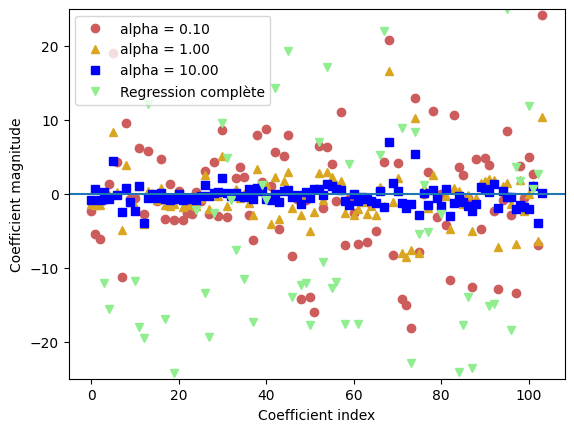

In [50]:
# Regression ridge 
alphas = [0.1,1.0,10.0]
scores_apprentissage = []
scores_entrainement = []
coefficients = []
from sklearn.linear_model import Ridge
for alpha in alphas :
    ridge = Ridge(alpha=alpha).fit(X_train,y_train)
    score_apprentissage = ridge.score(X_train,y_train)
    score_entrainement = ridge.score(X_test,y_test)
    coefficients.append(ridge.coef_)
    scores_apprentissage.append(score_apprentissage)
    scores_entrainement.append(score_entrainement)
# display frame of scores upon alpha
d = { 'alpha': alphas, 'score entrainnement': scores_entrainement, 'score_apprentissage': scores_apprentissage}
df = pd.DataFrame(data=d)
print(df)

# display the momdel's coeffs of differents alphas
shape = ['o','^','s']
color = ['indianred','goldenrod','blue']
for index in [0,1,2]:
    label = "alpha = {:.2f}".format(10**(index-1))
    plt.plot(coefficients[index],shape[index],c=color[index],label=label)
# On ajoute le tracé pour les coeffs non régularisés
plt.plot(linearRegression.coef_, "v", c='lightgreen', label="Regression complète")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

In [72]:
# Régression lasso 
from sklearn.linear_model import Lasso
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y)
lasso = Lasso().fit(X_train,y_train)
# facteur de régularisation
alphas = [0.001,0.01,0.1,1.0,1.5]
# nombre de pas dans la descente
n_iters = [1000,10000,100000]

score_apprentissage_par_iter = []
score_entrainement_par_iter = []
features_par_iter = []

for alpha in alphas :
    score_apprentissage = []
    score_entrainement = []
    features = []
    for ite in n_iters :
        lasso = Lasso(alpha=alpha,max_iter=ite).fit(X_train,y_train)
        score_apprentissage.append(lasso.score(X_train,y_train))
        score_entrainement.append(lasso.score(X_test,y_test))
        features.append(np.sum(lasso.coef_ != 0))
    score_apprentissage_par_iter.append(score_apprentissage)
    score_entrainement_par_iter.append(score_entrainement)
    features_par_iter.append(features)

data = []
for index in range(0,4):
    df = pd.DataFrame(data={"iterations":n_iters,
                            "score apprentissage":score_apprentissage_par_iter[index],
                            "score entrainement":score_entrainement_par_iter[index],
                            "param non nuls": features_par_iter[index]})
    print("Valeur de alpha : {}".format(alphas[index]))
    print(df)


/Users/luc/Workspace/python/environnements/jupyterEnv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.206e+02, tolerance: 3.158e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luc/Workspace/python/environnements/jupyterEnv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.263e+01, tolerance: 3.158e+00
  model = cd_fast.enet_coordinate_descent(


Valeur de alpha : 0.001
   iterations  score apprentissage  score entrainement  param non nuls
0        1000             0.916206            0.823421              75
1       10000             0.920303            0.820123              72
2      100000             0.920391            0.820363              71
Valeur de alpha : 0.01
   iterations  score apprentissage  score entrainement  param non nuls
0        1000             0.881488            0.771992              26
1       10000             0.881488            0.771992              26
2      100000             0.881488            0.771992              26
Valeur de alpha : 0.1
   iterations  score apprentissage  score entrainement  param non nuls
0        1000              0.76754            0.633553               5
1       10000              0.76754            0.633553               5
2      100000              0.76754            0.633553               5
Valeur de alpha : 1.0
   iterations  score apprentissage  score entrainement  p